In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.path.dirname("."), '..'))
sys.path.insert(0, parent_dir)

from bsmodel import BSModel
import numpy as np
import matplotlib.pyplot as plt
import bridgestan as bs
from scipy.stats import norm
from ipywidgets import interact, FloatSlider

In [2]:
homedir = "/Users/edward/" # "/mnt/c/Users/jccer/" # 

In [3]:
bs.set_bridgestan_path(homedir + "bridgestan")

In [4]:
bs_model = BSModel(stan_file = homedir + "mcmcexperiments/stan/funnel.stan",
                   data_file = homedir + "mcmcexperiments/stan/funnel.json")

/Users/edward/venvs/py3/lib/python3.12/site-packages/bridgestan/model.py:177: RuntimeWarning: The version of the compiled model does not match the version of the Python package. Consider recompiling the model.
  warnings.warn(


In [5]:
x = np.linspace(-9, 9, 301)
y = np.linspace(-15, 15, 301)

In [6]:
z = np.zeros(11)
Z = np.zeros((301, 301))
for ix, xn in enumerate(x):
    for iy, yn in enumerate(y):
        z[0] = xn
        z[1] = yn
        Z[ix, iy] = bs_model.log_density(z)

(-20.0, 20.0)

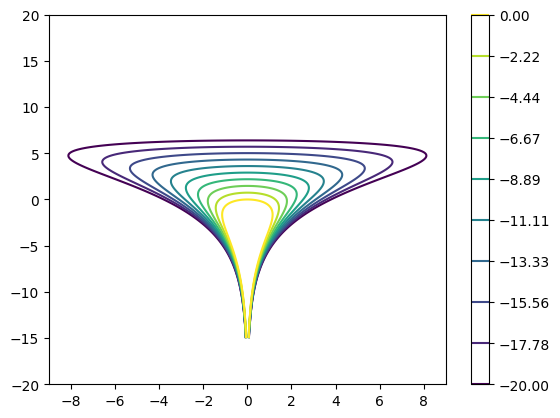

In [7]:
plt.contour(x, y, Z, levels = np.linspace(-20, 0, 10))
plt.colorbar()
plt.ylim([-20, 20])